In [1]:
# !pip install gensim
# !pip install python-Levenshtein
# This program is run under the Google Colab.

In [2]:
import gensim
import pandas as pd

### Reading and Exploring the Dataset
The dataset we are using here is a subset of Amazon reviews from the Sports & Outdoors category. The data is stored as a JSON file and can be read using pandas.

Link to the Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Sports_and_Outdoors_5.json.gz

In [6]:
df = pd.read_json("../../Untitled Folder/Sports_and_Outdoors_5.json", lines=True)
df

reviewerID        asin  \
0         AIXZKN4ACSKI  1881509818   
1       A1L5P841VIO02V  1881509818   
2        AB2W04NI4OEAD  1881509818   
3       A148SVSWKTJKU6  1881509818   
4        AAAWJ6LW9WMOO  1881509818   
...                ...         ...   
296332  A2XX2A4OJCDNLZ  B00LFPS0CY   
296333  A3LGT6UZL99IW1  B00LFPS0CY   
296334   ASKZO80Z1RKTR  B00LFPS0CY   
296335   APRNS6DB68LLV  B00LFPS0CY   
296336  A3UJRNI8UR4871  B00LFPS0CY   

                                            reviewerName helpful  \
0                                           David Briner  [0, 0]   
1                                        Jason A. Kramer  [1, 1]   
2                                             J. Fernald  [2, 2]   
3                         Jusitn A. Watts "Maverick9614"  [0, 0]   
4                                           Material Man  [0, 0]   
...                                                  ...     ...   
296332                               RatherLiveInKeyWest  [2, 3]   
296333  Richard C. Drew "Anaal Nathra/Uthe vas Bethod...  [0, 0]   
296334                                         Robin Lee  [0, 0]   
296335                  Rob Slaven "slavenrm@gmail. com"  [1, 1]   
296336                               Wulfstan "wulfstan"  [2, 2]   

                                               reviewText  overall  \
0       This came in on time and I am veru happy with ...        5   
1       I had a factory Glock tool that I was using fo...        5   
2       If you don't have a 3/32 punch or would like t...        4   
3       This works no better than any 3/32 punch you w...        4   
4       I purchased this thinking maybe I need a speci...        4   
...                                                   ...      ...   
296332  This is a water bottle done right. It is a ver...        5   
296333  If you're looking for an insulated water bottl...        5   
296334  This Hydracentials Sporty 25 OZ, double insula...        5   
296335  As usual I received this item free in exchange...        5   
296336  Hydracentials insulated 25 oz water bottle.Thi...        5   

                                                  summary  unixReviewTime  \
0                                          Woks very good      1390694400   
1                       Works as well as the factory tool      1328140800   
2                               It's a punch, that's all.      1330387200   
3                         It's a punch with a Glock logo.      1328400000   
4                 Ok,tool does what a regular punch does.      1366675200   
...                                                   ...             ...   
296332  Hydracentials Sporty 25 Oz Stainless Steel Wat...      1405036800   
296333          Large, incredibly well made water bottle!      1405641600   
296334             "Great Water Bottle For Hot Day"......      1405900800   
296335  A pretty impressive water bottle.  Best I've s...      1405900800   
296336                                     "Cool" Bottle!      1405382400   

         reviewTime  
0       01 26, 2014  
1        02 2, 2012  
2       02 28, 2012  
3        02 5, 2012  
4       04 23, 2013  
...             ...  
296332  07 11, 2014  
296333  07 18, 2014  
296334  07 21, 2014  
296335  07 21, 2014  
296336  07 15, 2014  

[296337 rows x 9 columns]

In [7]:
df.shape

(296337, 9)

### Simple Preprocessing & Tokenization
The first thing to do for any data science task is to clean the data.
For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. 
This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

In [8]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [9]:
review_text

0         [this, came, in, on, time, and, am, veru, happ...
1         [had, factory, glock, tool, that, was, using, ...
2         [if, you, don, have, punch, or, would, like, t...
3         [this, works, no, better, than, any, punch, yo...
4         [purchased, this, thinking, maybe, need, speci...
                                ...                        
296332    [this, is, water, bottle, done, right, it, is,...
296333    [if, you, re, looking, for, an, insulated, wat...
296334    [this, hydracentials, sporty, oz, double, insu...
296335    [as, usual, received, this, item, free, in, ex...
296336    [hydracentials, insulated, oz, water, bottle, ...
Name: reviewText, Length: 296337, dtype: object

In [10]:
review_text.loc[0]

['this',
 'came',
 'in',
 'on',
 'time',
 'and',
 'am',
 'veru',
 'happy',
 'with',
 'it',
 'haved',
 'used',
 'it',
 'already',
 'and',
 'it',
 'makes',
 'taking',
 'out',
 'the',
 'pins',
 'in',
 'my',
 'glock',
 'very',
 'easy']

In [11]:
df.reviewText.loc[0]

'This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy'

### Training the Word2Vec Model

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

#### Initialize the model

In [12]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)


#### Build Vocabulary

In [13]:
model.build_vocab(review_text, progress_per=1000)

#### Train the Word2Vec Model

In [14]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(91337426, 121496535)

### Finding Similar Words and Similarity between words
https://radimrehurek.com/gensim/models/word2vec.html

In [15]:
model.wv.most_similar("awful")

[('horrible', 0.7057331800460815),
 ('terrible', 0.6810497641563416),
 ('ugly', 0.6050217747688293),
 ('unpleasant', 0.5894089937210083),
 ('imposter', 0.5629051923751831),
 ('unusual', 0.5540648698806763),
 ('engineer', 0.5533409118652344),
 ('isolated', 0.5521477460861206),
 ('unfortunate', 0.5451350808143616),
 ('unacceptable', 0.545034646987915)]

In [16]:
model.wv.similarity(w1="good", w2="great")

0.77770394

In [17]:
model.wv.similarity(w1="slow", w2="steady")

0.34121108

# Below, we un under Google Colab

# Google Colab read Google Drive

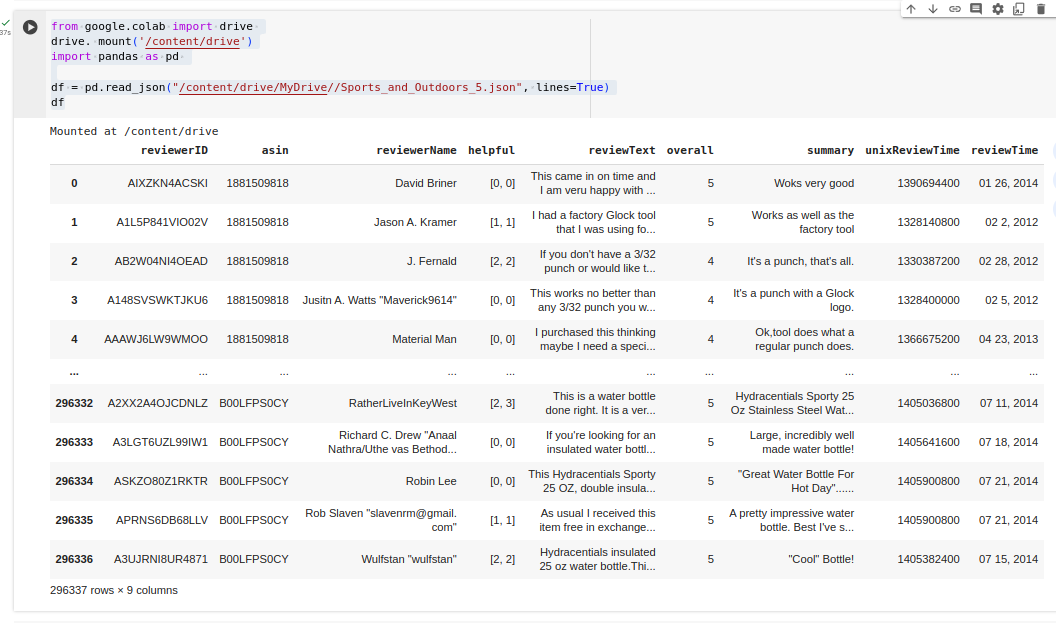

# Shape, review test

# 

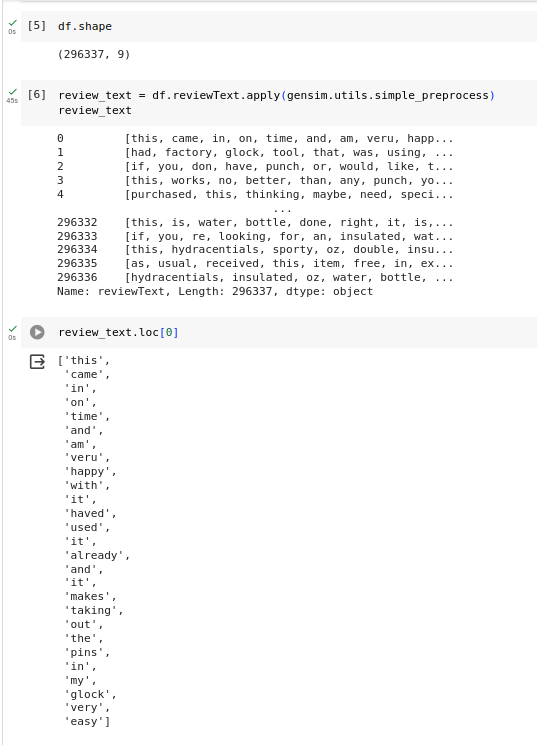

#



# Model, Similarity

# 

